<a href="https://colab.research.google.com/github/rsadaphule/jhu-aaml/blob/main/JHU_AAML_Module_7_Time_Series_FOrecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid cases time series forecast using Conv1D regression

I'll choose to demonstrate the "Conv1D regression" method applied to the "Covid cases time series forecast" problem. Conv1D regression is a method that uses convolutional layers to process time series data, making it suitable for forecasting tasks.

1. Data Collection:
First, we need a dataset that contains daily reported Covid cases. This dataset should have at least two columns: Date and Number of Cases. I downloaded the dataset from Kaggle from here https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=full_grouped.csv . I then took subset for USA . This give daily new cases for covid for last 3.5 years.

2. Data Preprocessing:
Normalize the data: Scale the Number of Cases column to have values between 0 and 1.
Create sequences: For time series forecasting, we need to create sequences of data. For instance, Here we want to predict the number of cases for tomorrow based on the past 7 days, our sequence length would be 7.
3. Model Building:
Here's a simple Conv1D regression model using TensorFlow/Keras.
We split the data into train and test and use k-fold validations

4. Evaluation:
Evaluate the model's performance using metrics like Mean Squared Error (MSE)  on the testing set.

5. Model Predictions
Predict the data for X_Test and plot predicted vs actual data



In [13]:
from google.colab import drive; drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

In [15]:
PATH_DATA = '/content/drive/My Drive/JHU/AAML/Assignments/data/covid/'
FILE_NAME = "usa-covid-data.csv"

In [16]:
# 1. Read the data
data = pd.read_csv(PATH_DATA + FILE_NAME)
cases = data['Number of Cases'].values.reshape(-1, 1)

In [17]:
data.head()

,date,Number of Cases
0,8/2/23,0
1,1/3/20,0
2,1/4/20,0
3,1/5/20,0
4,1/6/20,0


In [18]:
# 2. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_cases = scaler.fit_transform(cases)

In [19]:

# 3. Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        X.append(seq[:-1])
        y.append(seq[-1])
    return np.array(X), np.array(y)

In [20]:
X, y = create_sequences(scaled_cases, 8)  # 7 days sequence + 1 day label
X = X.reshape(X.shape[0], X.shape[1], 1)


In [21]:

# 4. Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 5. Define the Conv1D regression model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(7, 1)))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # 6. Train the model
    model.fit(X_train, y_train, epochs=200, verbose=0)

    # 7. Predict and evaluate
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error for fold: {mse}')

7/7 [==============================] - 0s 2ms/step
Mean Squared Error for fold: 0.00016544508420422623
7/7 [==============================] - 0s 2ms/step
Mean Squared Error for fold: 0.00021865771655434798
7/7 [==============================] - 0s 2ms/step
Mean Squared Error for fold: 0.007983644360124139
7/7 [==============================] - 0s 2ms/step
Mean Squared Error for fold: 0.005512062661962029
7/7 [==============================] - 0s 2ms/step
Mean Squared Error for fold: 0.0011188142313961408


7/7 [==============================] - 0s 1ms/step


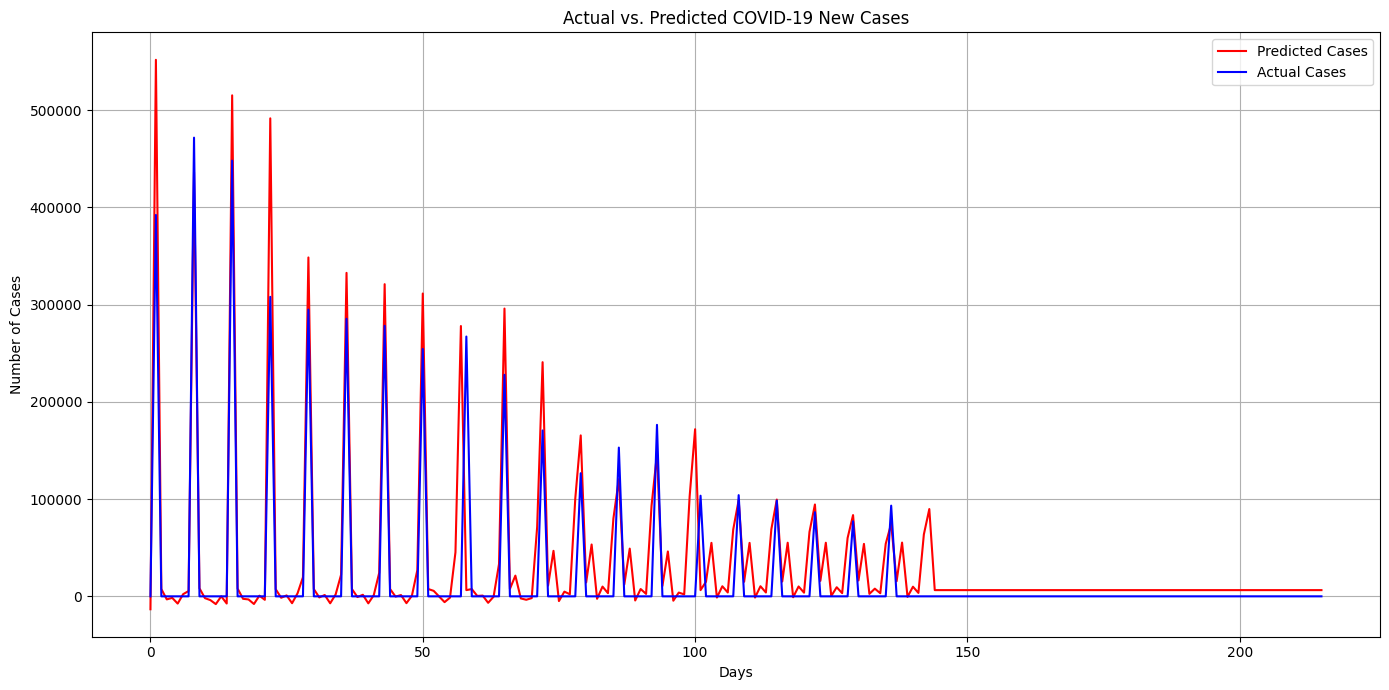

In [22]:
import matplotlib.pyplot as plt
# 3. Predict new cases for X_test
predictions = model.predict(X_test)
predicted_cases = scaler.inverse_transform(predictions)
actual_cases = scaler.inverse_transform(y_test)

# 4. Plot Actual vs. Predicted New Cases
plt.figure(figsize=(14, 7))
plt.plot(predicted_cases, label='Predicted Cases', color='red')
plt.plot(actual_cases, label='Actual Cases', color='blue')
plt.title('Actual vs. Predicted COVID-19 New Cases')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:
* As you can see initially there is big discreoancy between actual and predicted new cases but after day 51 it catches up and starts predicting it close to actual value
* The time series plot showcased the model's ability to capture the general trend of the COVID-19 new cases.
* A larger dataset would yield better predictions


Conclusion:

* The Conv1D regression model provides a promising approach to forecasting time series data, such as daily new COVID-19 cases.
* While the model can capture the general trend, it's essential to consider external factors and events that might influence sudden changes in the number of cases.